# Model Visualizers

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_powerlaw, sim_combined
from neurodsp.spectral import compute_spectrum, trim_spectrum

In [2]:
# Import local code
from vcode.plts.models import *
from vcode.build.models import *
from vcode.settings.models import *
from vcode.measures.models import *
from vcode.plts.settings import TITLE_FD

In [3]:
import seaborn as sns
sns.set_context('talk')

In [4]:
from matplotlib import rc
rc('font',**{'family':'serif', 'serif':['Times']})
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('text', usetex=True)

## Load Brain

In [5]:
# Load the brain image to use
import matplotlib.image as mpimg
img = mpimg.imread('img/brain.png')

## Simulate Signals

In [6]:
# Settings
N_SECONDS = 20
ap_range = (1, 150)

In [7]:
sig = sim_powerlaw(N_SECONDS, FS, -1.25, f_range=ap_range)

In [8]:
comp_vars = [1, 1]

comps = {'sim_powerlaw' : {'exponent' : -1.25, 'f_range' : ap_range},
         'sim_oscillation' : {'freq' : 10}}

comps = {'sim_powerlaw' : {'exponent' : -1.25, 'f_range' : ap_range},
         'sim_bursty_oscillation' : {'freq' : 10}}

In [9]:
sig = sim_combined(N_SECONDS, FS, comps, comp_vars)

In [10]:
N_SECONDS_COMB = 5

In [11]:
comp_vars1 = [0.5, 1]
comps1 = {'sim_powerlaw' : {'exponent' : -1.0, 'f_range' : ap_range},
         'sim_bursty_oscillation' : {'freq' : 10}}

comp_vars2 = [0.5, 0.5]
comps2 = {'sim_powerlaw' : {'exponent' : -1.5, 'f_range' : ap_range},
         'sim_bursty_oscillation' : {'freq' : 10}}

In [12]:
sig1 = sim_combined(N_SECONDS_COMB, FS, comps1, comp_vars1)
sig2 = sim_combined(N_SECONDS_COMB, FS, comps2, comp_vars2)

In [13]:
sig = np.concatenate([sig1, sig2])

In [14]:
comp_vars1 = [0.5, 0.5]
comps1 = {'sim_powerlaw' : {'exponent' : -1.5, 'f_range' : ap_range},
         'sim_bursty_oscillation' : {'freq' : 10}}

In [15]:
sig1 = sim_combined(5, FS, comps1, comp_vars1)
sig2 = sim_powerlaw(3, FS, -0.75, f_range=ap_range)
sig3 = sim_combined(2, FS, comps1, comp_vars1)

In [16]:
sig = np.concatenate([sig1, sig2, sig3])

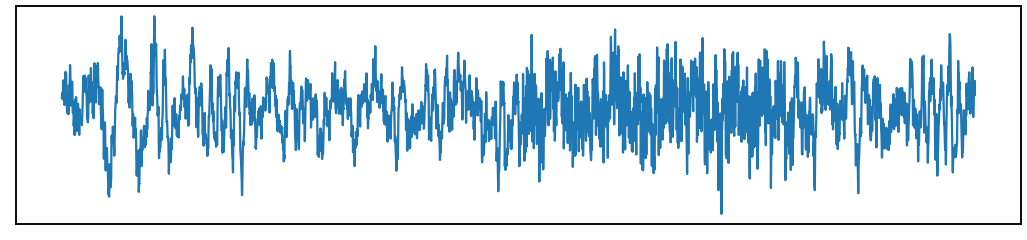

In [17]:
_, axes = plt.subplots(figsize=(18, 4))
plot_timeseries(sig, ax=plt.gca())

In [18]:
freqs_all, powers_all = trim_spectrum(*compute_spectrum(sig, fs=FS), F_RANGE)

In [19]:
minv, maxv = np.min(powers_all), np.max(powers_all)

In [20]:
#YLIM = [minv - 0.4 * minv, maxv + 1. * maxv]
YLIM = None

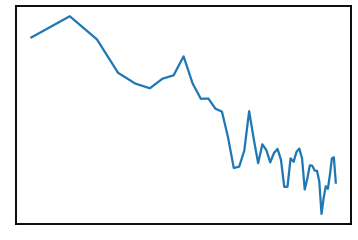

In [21]:
plot_spectra(freqs_all, powers_all, ylim=YLIM)

## Make Example Image

Text(0.5, 1.0, 'Features')

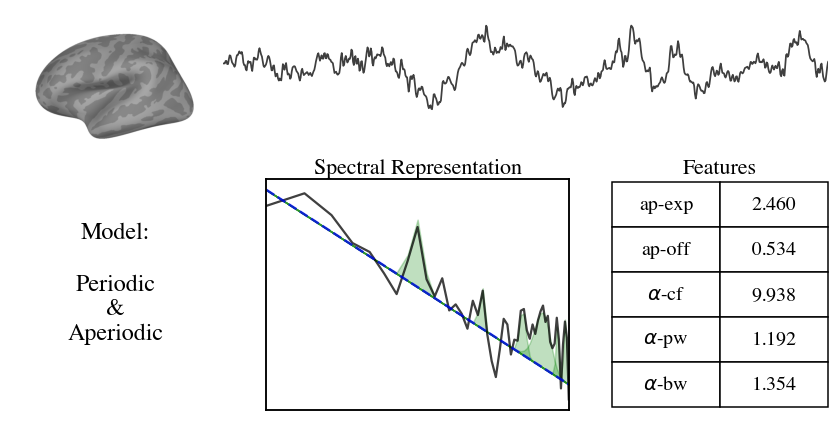

In [22]:
#MODEL = 'freq'
#MODEL = 'band'
MODEL = 'peap'

fig, axes = make_axes()

# Define empty kwargs to pass extra things
kwargs = {}

# Compute needed things
freqs, powers = trim_spectrum(*compute_spectrum(sig[0:1000], fs=FS), F_RANGE)

if MODEL == 'peap':
    kwargs['fm'] = fit_specparam(freqs, powers)

# Axis 0
#axes[0].text(0.4, 0.5, 'add brain')
axes[0].imshow(img)
axes[0].axis('off')

# Axis 1
plot_timeseries(sig, colors='black', alpha=0.75, lw=1.75,
                ax=axes[1], xlim=[0, 750])
axes[1].axis('off')

# Axis 2
add_model_text(MODEL, ax=axes[2])

# Axis 3
plot_model_spectrum(MODEL, freqs, powers, ax=axes[3], **kwargs)
axes[3].set_title('Spectral Representation', fontdict=TITLE_FD)

# Axis 4
table_data = get_features(MODEL, freqs, powers, **kwargs)
plot_table(table_data, ax=axes[4])
axes[4].set_title('Features', fontdict=TITLE_FD)

## Build Function

In [23]:
#MODEL = 'freq'
MODEL = 'band'
#MODEL = 'peap'

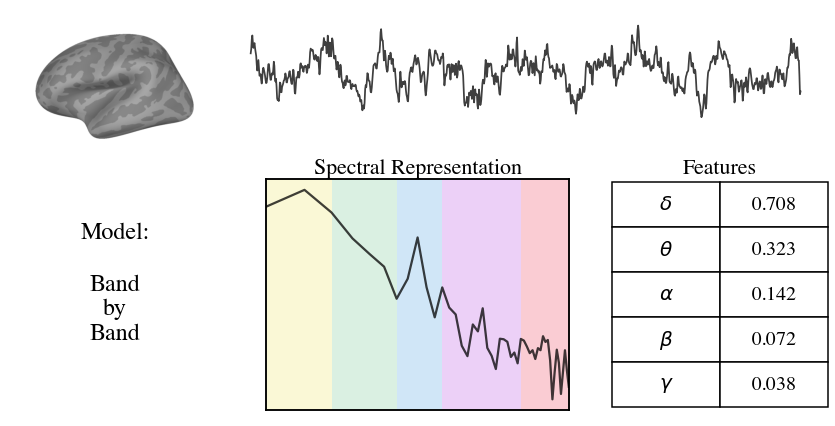

In [24]:
build_all(sig, MODEL, img, n_build=5, label='model_' + MODEL, save=False)

## Make Brain

Note: only need to re-run this to regenerate brain image.

This section requires MNE. 

In [25]:
# import mne
# Brain = mne.viz.get_brain_class()

# brain = Brain('fsaverage', surf='inflated', cortex='low_contrast', background='white', alpha=1.)
# #brain = Brain('sample', cortex='low_contrast', background='white')

# brain.save_image('brain.png')